In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [17]:
df=pd.read_csv("Amazon Sales data.csv")
df.shape

(100, 14)

In [100]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Sales,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255,159,2533654,1582243,951410
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205,117,576782,328376,248406
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651,524,1158502,933903,224598
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9,6,75591,56065,19525
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651,524,3296425,2657347,639077
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255,159,759202,474115,285087
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668,502,2798046,2104134,693911
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154,90,1245112,734896,510216
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81,56,496101,343986,152114
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205,117,1356180,772106,584073


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [29]:
df[['Total Profit','Total Cost','Total Revenue','Unit Cost','Unit Price']]=df[['Total Profit','Total Cost','Total Revenue','Unit Cost','Unit Price']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Region          100 non-null    object
 1   Country         100 non-null    object
 2   Item Type       100 non-null    object
 3   Sales Channel   100 non-null    object
 4   Order Priority  100 non-null    object
 5   Order Date      100 non-null    object
 6   Order ID        100 non-null    int64 
 7   Ship Date       100 non-null    object
 8   Units Sold      100 non-null    int64 
 9   Unit Price      100 non-null    int32 
 10  Unit Cost       100 non-null    int32 
 11  Total Revenue   100 non-null    int32 
 12  Total Cost      100 non-null    int32 
 13  Total Profit    100 non-null    int32 
dtypes: int32(5), int64(2), object(7)
memory usage: 9.1+ KB


In [36]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [40]:
df.rename(columns={'Total Revenue':'Total Sales'},inplace=True)

In [56]:
#COUNTRY-WISE Sales :
rd= df.groupby(['Country'],as_index=False)[['Total Sales','Total Cost','Total Profit']].sum().sort_values(by='Total Sales',ascending=False).head(15)
rd.head()

,Country,Total Sales,Total Cost,Total Profit
24,Honduras,6336544,4726597,1609947
46,Myanmar,6161257,4358486,1802771
16,Djibouti,6052890,3627571,2425317
72,Turkmenistan,5822036,4554777,1267257
41,Mexico,5643355,4185412,1457942


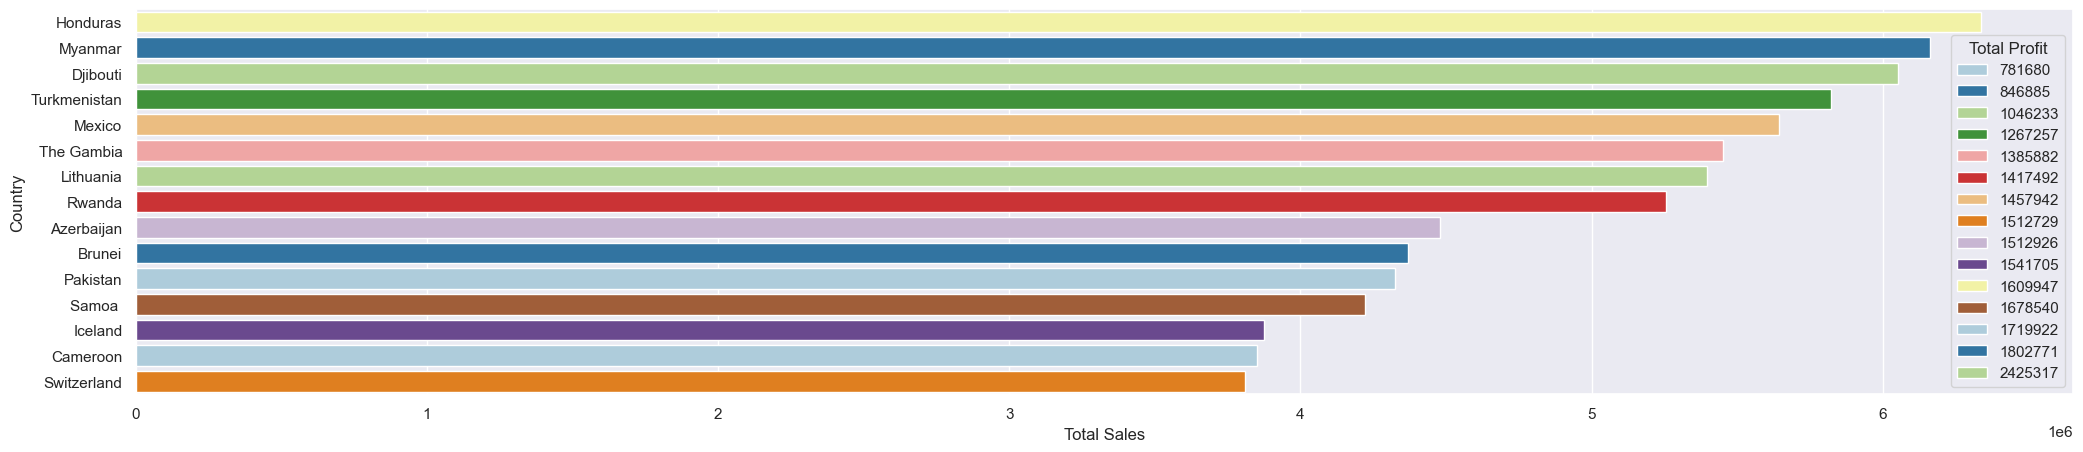

In [244]:
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=rd,x='Total Sales',y='Country',hue='Total Profit',palette=custom_palette)
custom_palette = sns.color_palette("Paired", 15)



In [ ]:
# from the above figure it is clear that highest sale is from HONDURAS and maximum profit is from DIJBOUTI.

In [ ]:
#ITEM-WISE SALES:

In [61]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Sales', 'Total Cost', 'Total Profit'],
      dtype='object')

In [83]:
ids=df.groupby(['Item Type'],as_index=False)[['Total Sales','Total Profit']].sum().sort_values(by='Total Sales',ascending=False).head(15)
ids.head()

,Item Type,Total Sales,Total Profit
4,Cosmetics,36601505,14556043
8,Office Supplies,30585375,5929579
6,Household,29889708,7412601
0,Baby Food,10350325,3886641
3,Clothes,7787286,5233329


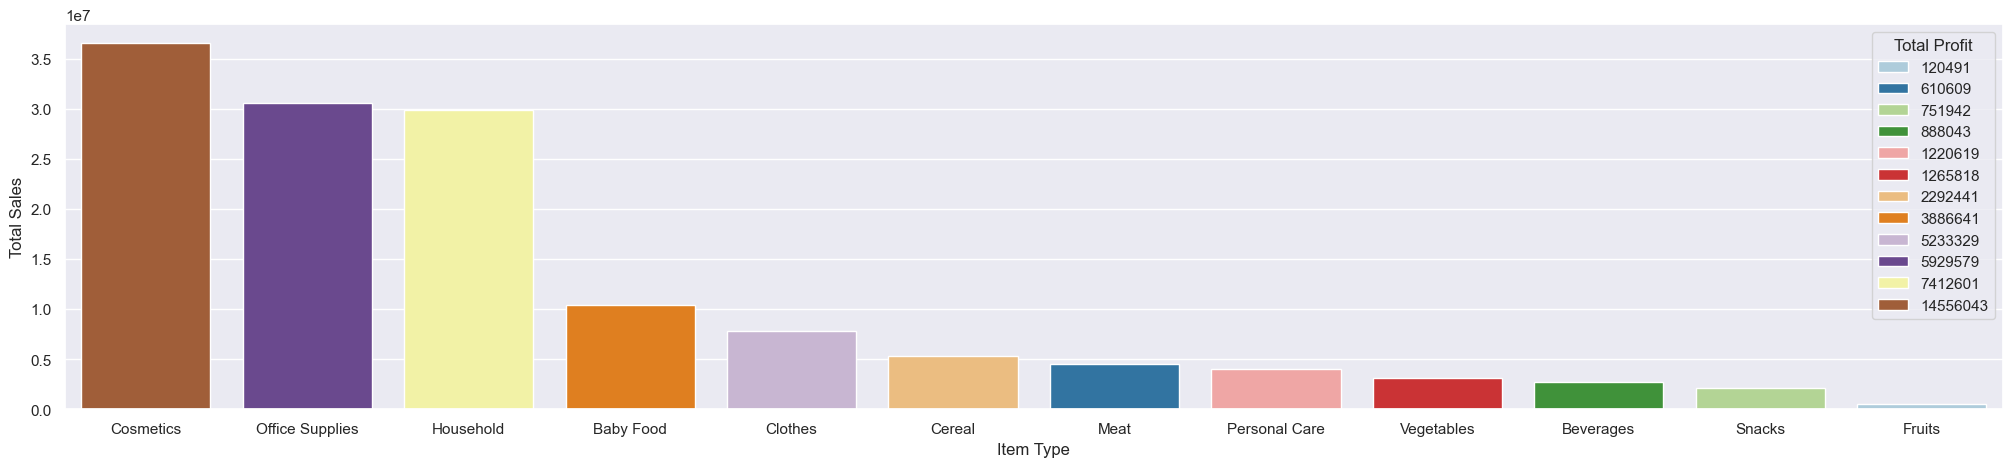

In [238]:
sns.set(rc={'figure.figsize':(25,5)})

sns.barplot(data=ids,x='Item Type',y='Total Sales',hue='Total Profit',palette=custom_palette)
custom_palette = sns.color_palette("Paired", 12)

In [86]:
# From above figure we can say that most selling Item is Cosmetics and also the item that earned most profit is Cosmetics, 
# then comes the Households ,clothes and Office supplies.

In [87]:
#CHANNEL WISE SALES AND PROFIT:

In [89]:
cs=df.groupby(['Sales Channel'],as_index=False)[['Total Sales','Total Profit']].sum().sort_values(by='Total Sales',ascending=False).head(15)
cs.head

<bound method NDFrame.head of   Sales Channel  Total Sales  Total Profit
0       Offline     79094788      24920706
1        Online     58253937      19247450>

C:\Users\harvi\AppData\Local\Temp\ipykernel_13800\3924487796.py:1: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  sns.barplot(data=cs,x='Sales Channel',y='Total Sales',hue='Total Profit',palette=custom_palette)


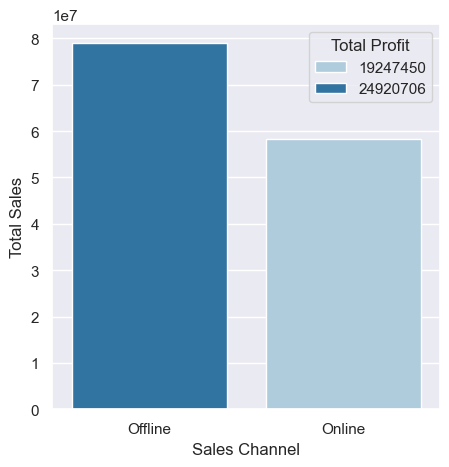

In [236]:
sns.barplot(data=cs,x='Sales Channel',y='Total Sales',hue='Total Profit',palette=custom_palette)
custom_palette=sns.color_palette("Paired",12)

In [91]:
# from above figure we can say that max sale and profit is from Offline Channel.

In [ ]:
#UNIT OF DIFFERENT ITEMS SOLD:

In [95]:
ud= df.groupby(["Item Type"],as_index=False)["Units Sold"].sum().sort_values(by='Units Sold').sort_values('Units Sold',ascending=False)
ud.shape

(12, 2)

<Axes: xlabel='Units Sold', ylabel='Item Type'>

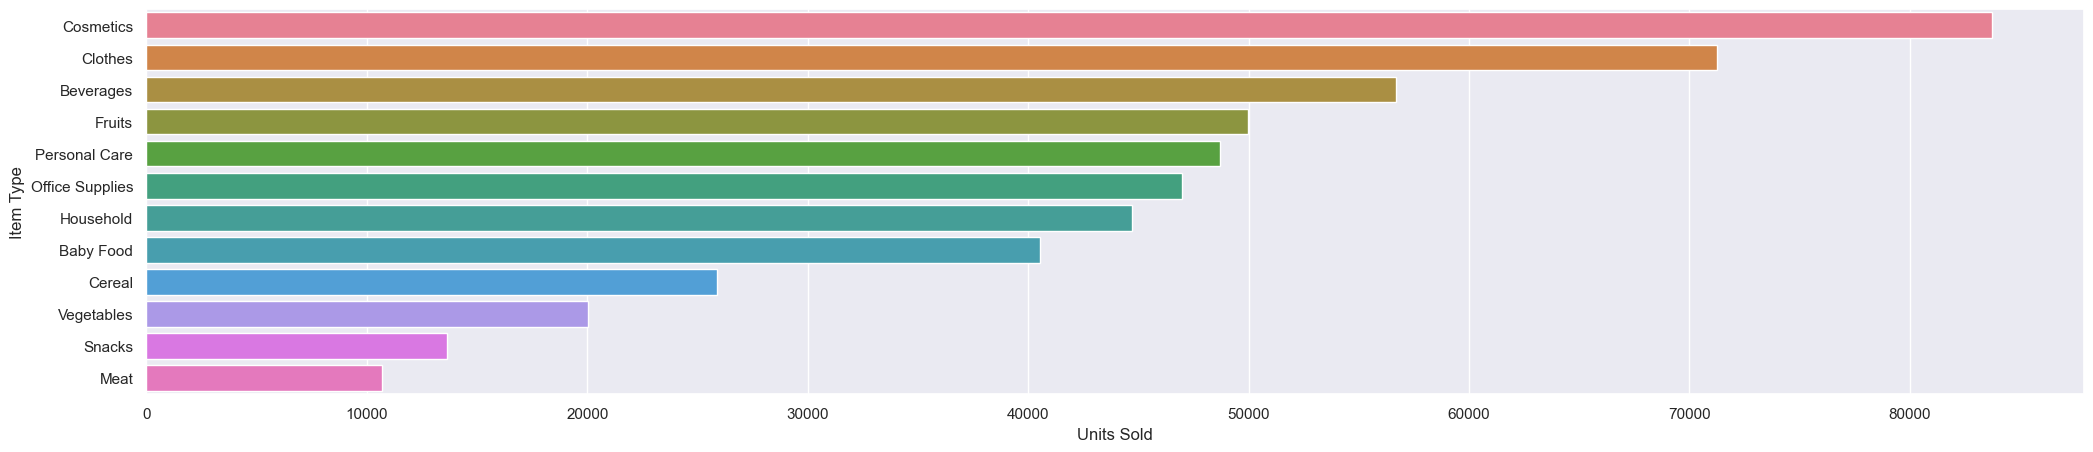

In [98]:
sns.barplot(x="Units Sold",y="Item Type",data=ud,hue="Item Type")

In [ ]:
# from the graph it is found that Cosmetics,Clothes and Beverages are the top selling Items and total different types of elements are 12.

In [103]:
df["Order Priority"].value_counts()

Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64

In [136]:
pp=df.groupby(['Order Priority',])[['Total Sales','Total Profit']].sum().sort_values('Total Profit',ascending=False)

C:\Users\harvi\AppData\Local\Temp\ipykernel_13800\2518012630.py:3: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x='Order Priority',y='Total Profit',data=pp,hue='Order Priority',palette=custom_palette)


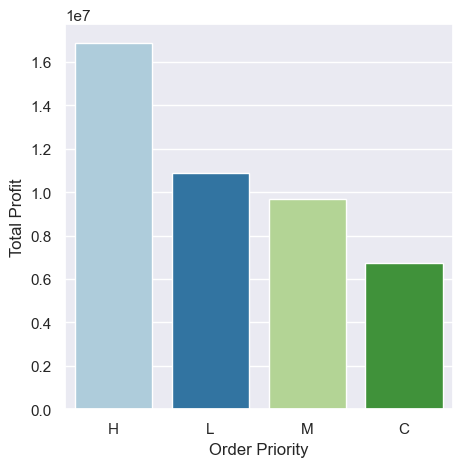

In [235]:
sns.set(rc={'figure.figsize':(5,5)})

sns.barplot(x='Order Priority',y='Total Profit',data=pp,hue='Order Priority',palette=custom_palette)
custom_palette = sns.color_palette("Paired", 20)

In [ ]:
# priority-wise H has max profit, then L,M,C..

In [ ]:
#CONCLUSION:

In [ ]:
#--Priority wise H-type order has maximum profit.
#--Cosmetics is top selling items then comes clothes and beverages units wise, but seeing profit wise Cosmetics is most profitable then households and then clothes.
#--Maximum Sales are from offline channel
#--highest sale is from HONDURAS and maximum profit is from DIJBOUTI (Country-wise)


In [157]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month']=pd.to_datetime(df['Order Date']).dt.month
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Sales,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255,159,2533654,1582243,951410,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205,117,576782,328376,248406,2012,8
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651,524,1158502,933903,224598,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9,6,75591,56065,19525,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651,524,3296425,2657347,639077,2013,2


In [164]:
#Years-Wise Sales and Profit


C:\Users\harvi\AppData\Local\Temp\ipykernel_13800\299836152.py:3: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.barplot(data=yd,x='Year',y='Total Sales',hue='Total Profit',palette=custom_palette)


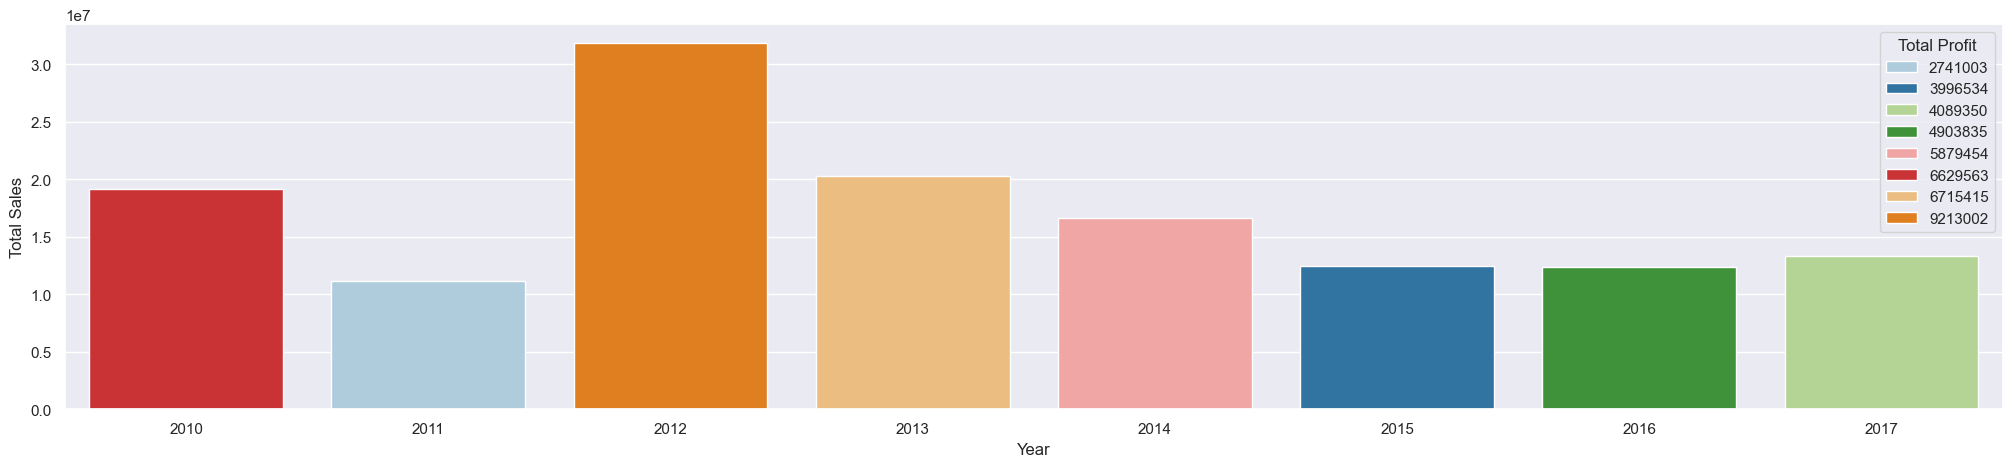

In [231]:
yd= df.groupby(['Year'],as_index=False)[['Total Sales','Total Cost','Total Profit']].sum().sort_values(by='Total Sales',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=yd,x='Year',y='Total Sales',hue='Total Profit',palette=custom_palette)
custom_palette = sns.color_palette("Paired", 12)

In [167]:
# It is clear from above that maximum profit incurred in 2012 and sales was maximum in that year then 2013 then 2010.

In [ ]:
#Month Wise Sale Data

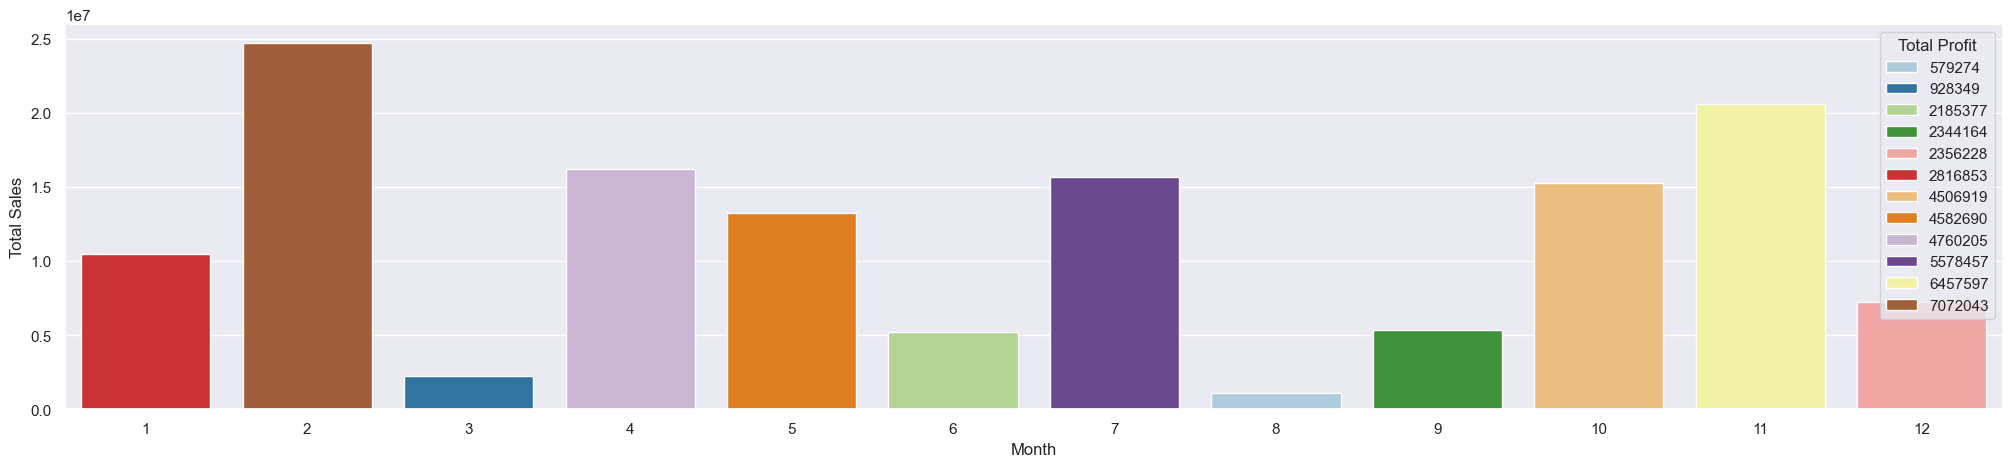

In [230]:
md= df.groupby(['Month'],as_index=False)[['Total Sales','Total Cost','Total Profit']].sum().sort_values(by='Total Sales',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=md,x='Month',y='Total Sales',hue='Total Profit',palette=custom_palette)
custom_palette = sns.color_palette("Paired", 12)

In [172]:
# from above it can be said that in feb maximum sales and profit occured then in november and then in july.

In [ ]:
#Year-Month Sales Data

C:\Users\harvi\AppData\Local\Temp\ipykernel_13800\1703048646.py:2: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  sns.barplot(data=ymd,x='Month',y='Total Profit',hue='Year',  palette=custom_palette)


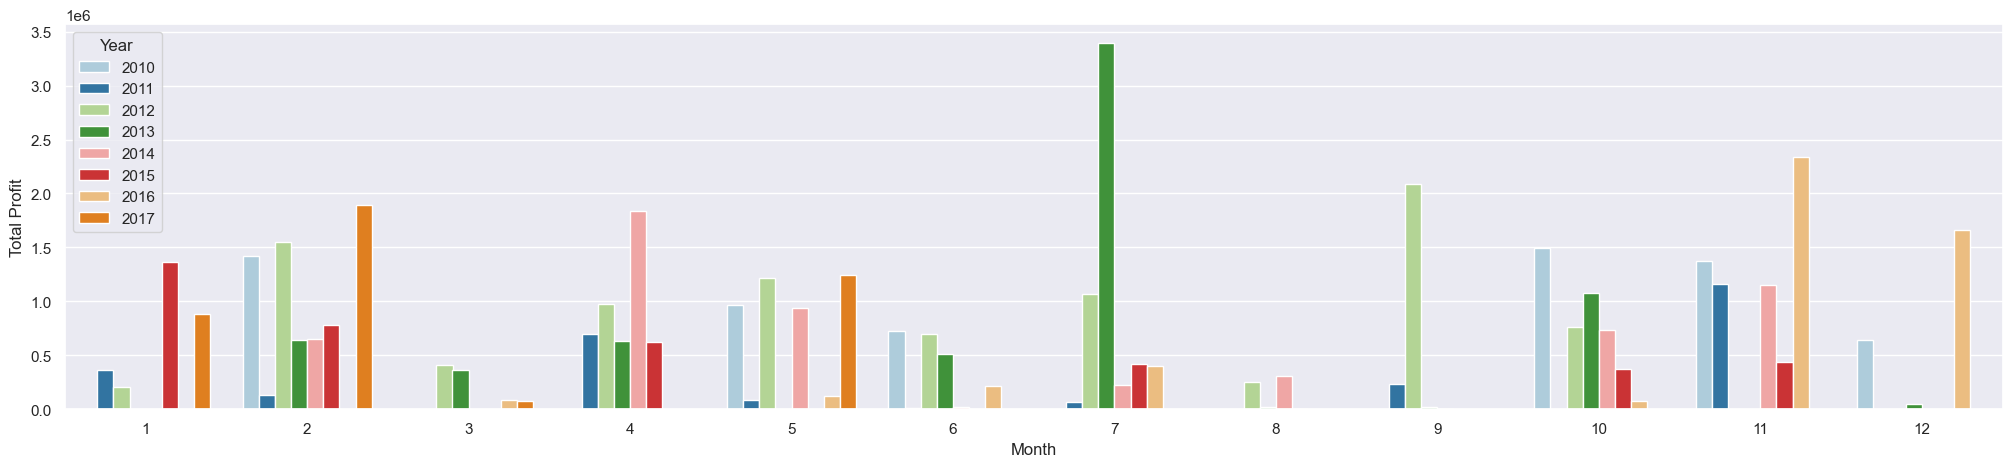

In [229]:
ymd= df.groupby(['Year','Month'])[['Total Sales','Total Cost','Total Profit']].sum().sort_values(by='Total Sales',ascending=False)
sns.barplot(data=ymd,x='Month',y='Total Profit',hue='Year',  palette=custom_palette)

custom_palette = sns.color_palette("Paired", 12)


In [222]:
# from above figure it can be seen that in 7th month in year 2013 maximum profit was attained. from the graph it can be said that
# max steady sale occures in month Feburary.